<h1>Multiple Linear Regression</h1>

<h3>Import of dependencies</h3>

In [39]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.formula.api import ols
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import warnings

<h3>Settings of notebook</h3>

In [2]:
warnings.filterwarnings("ignore")

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [8,6]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)
plt = setup_matplot()

<h3>Enter of data</h3>

In [8]:
df = pd.read_csv('../database/data.csv')

df.head(3)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95


In [9]:
df.shape

(36, 5)

In [10]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [14]:
X = df[['Volume','Weight']]

y = df['CO2']

In [15]:
print(X.shape)
print(y.shape)

(36, 2)
(36,)


<h3>Exploratory Data Analysis</h3>

In [16]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


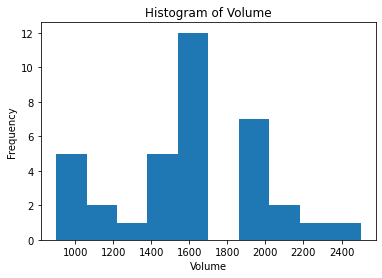

In [19]:
plt.hist(df['Volume'])
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

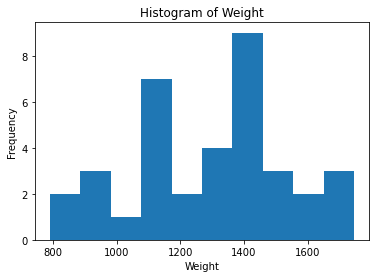

In [26]:
plt.hist(df['Weight'])
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

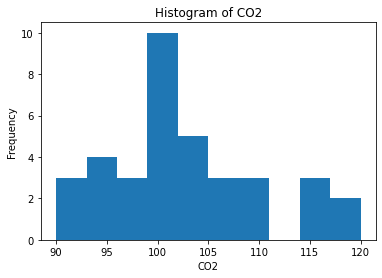

In [28]:
plt.hist(df['CO2'])
plt.title('Histogram of CO2')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

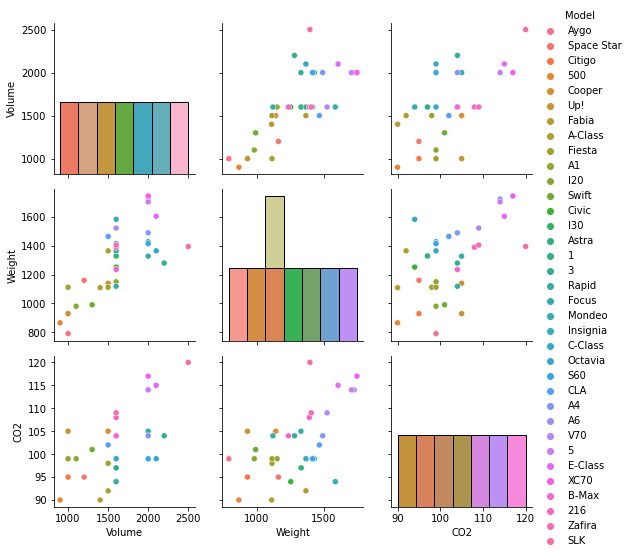

In [30]:
g = sns.PairGrid(df, hue="Model")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

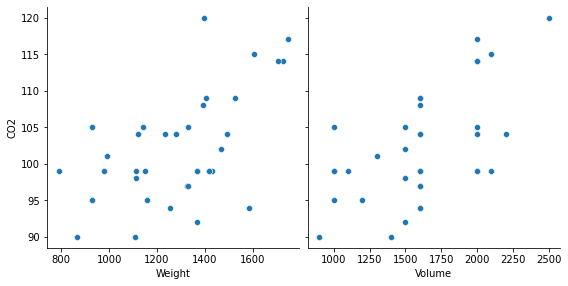

In [31]:
sns.pairplot(df, 
             x_vars=['Weight', 'Volume'], 
             y_vars='CO2', 
             height=4, 
             aspect=1, 
             kind='scatter')
plt.show()

<h3>Heatmap of correlation</h3>

In [33]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [34]:
correlation = df[['Volume', 'Weight', 'CO2']].corr()

correlation

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


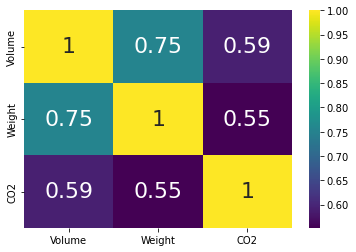

In [35]:
sns.heatmap(correlation, 
            annot=True, 
            cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

<h3>Applying of model</h3>

In [36]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [43]:
model = sm.OLS.from_formula('CO2 ~ Volume + Weight', df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000411
Time:                        22:46:54   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6947      5.564     14.322      0.0